<a href="https://colab.research.google.com/github/Hussahx/IT326-project/blob/main/it326_project_description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT326 project description

## Dataset Description

### Our Goal
our goal is to identify patterns in the habits and symptomes in cancer patients, aiming to raise awarness regarding harmful practices.



### Source of the Dataset
- **Source**: Kaggle site
- **Link**: [https://www.kaggle.com/datasets/rishidamarla/cancer-patients-data]( https://www.kaggle.com/datasets/rishidamarla/cancer-patients-data)

### General Information
This set shows a research on 1000(observations) cancer patients about different aspects of their lifestyle, we have 25 Attributes to discuss



- Patient Id : Nominal

- Age : Numeric

- Gender : Binary

- Air Pollution : Ordinal

- Alcohol use : Ordinal

- Dust Allergy : Ordinal

- OccuPational Hazards : Ordinal

- Genetic Risk : Ordinal

- chronic Lung Disease : Ordinal

- Balanced Diet : Ordinal

- Obesity : Ordinal

- Smoking : Ordinal

- Passive Smoker : Ordinal

- Chest Pain : Ordinal

- Coughing of Blood : Ordinal

- Fatigue : Ordinal

- Weight Loss : Ordinal

- Shortness of Breath : Ordinal

- Wheezing : Ordinal

- Swallowing Difficulty : Ordinal

- Clubbing of Finger Nails : Ordinal

- Frequent Cold : Ordinal

- Dry Cough : Ordinal

- Snoring : Ordinal

- Level : Ordinal

The class label is the attribute 'Level' which describes the patient's cancer level that could be 'Low', 'Medium' or 'High' .


In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("/CancerPatientDataSets.xlsx")  # Replace with your actual file name

# Save as CSV
df.to_csv("CancerPatientDataSets.csv", index=False)

print("Excel file has been converted to CSV successfully!")

Excel file has been converted to CSV successfully!


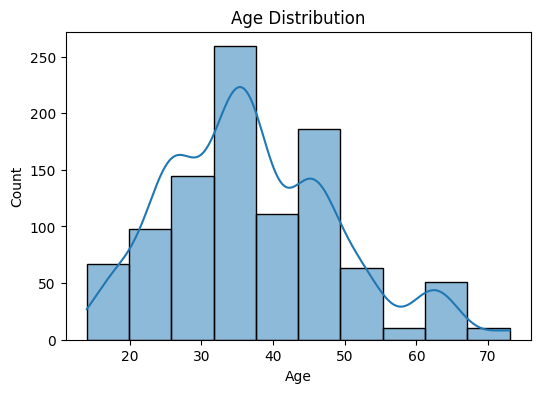

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

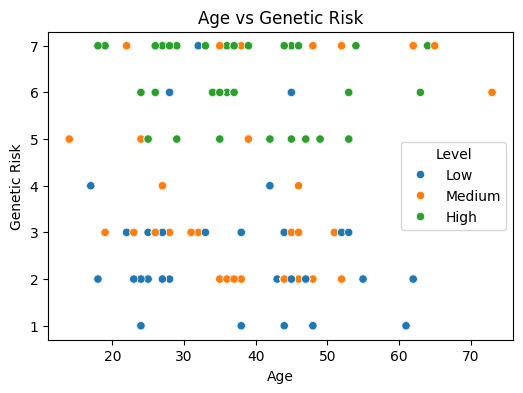

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Age"], y=df["Genetic Risk"], hue=df["Level"])
plt.title("Age vs Genetic Risk")
plt.show()

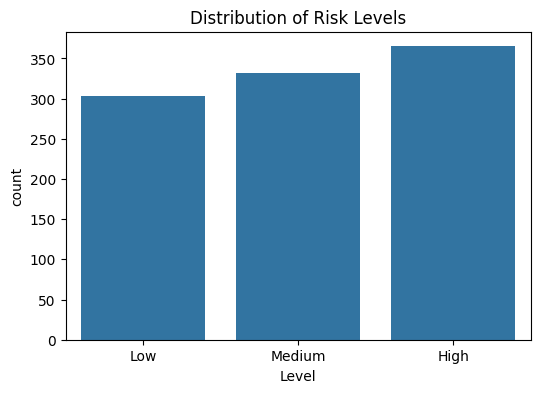

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Level"])
plt.title("Distribution of Risk Levels")
plt.show()

# Data Summarization and Preprocessing

to ensure our data maintains it's integrity and quality we applied diffrent data preprocessing methods including checking for missing values, detecting and removing outliers, correcting errors all in hopes of making our dataset more useful.

In [ ]:
#Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Load the dataset
CancerData= pd.read_csv('CancerPatientDataSets.csv')
df=pd.DataFrame(CancerData)
print(df.head())

  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4             

# Checking for missing values


In [ ]:
missing_values=df.isna().sum()
print("missing values per column:")
print(missing_values)

missing values per column:
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


# detecting and removing outliers
This process ensures that the data is cleaned of extreme values(outliers) that could affect model performance, therby enhancing data consistency.

# IQR method


In [ ]:

# choose threshold
threshold = 1.5

# using IQR first:
def identify_outliers(column_df):
    q1 = np.percentile(column_df, 25)
    q3 = np.percentile(column_df, 75)
    iqr = q3 - q1
    return (column_df < q1 - threshold * iqr) | (column_df > q3 + threshold * iqr)

# Select numeric columns (excluding 'Patient Id' and 'Level')
numeric_columns = df.select_dtypes(include=['int64']).columns.tolist()

# removeing outliers:
def remove_outliers(df):
    total_outliers_removed = 0  #keeping track of # of outliers
    for _ in range(10):  # Loop
        outlier_mask = np.any([identify_outliers(df[col]) for col in numeric_columns], axis=0)
        if not outlier_mask.any():
            break
        total_outliers_removed += outlier_mask.sum()
        df = df[~outlier_mask].copy()  # Keep non-outlier rows
    return df, total_outliers_removed

# Apply
print(f"Original rows: {len(df)}")
df_cleaned, total_outliers_removed = remove_outliers(df)
print(f"Removed {total_outliers_removed} outliers")
print(f"Rows after removing outliers: {len(df_cleaned)}")

Original rows: 1000
Removed 10 outliers
Rows after removing outliers: 990


#Statistical summary:
we used the common describe function that is used for the numeric attributes in the dataset. it calculates the mean, standard deviation, min, max, 25th percentile (Q1), 50th percentile (median), and 75th percentile (Q3), for each numeric column in the dataset. This summary helps us understand the distribution and variability of the data.


In [ ]:
Stat_summary = df_cleaned.select_dtypes(include=['number']).describe()
print(Stat_summary)

              Age      Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  990.000000  990.000000     990.000000   990.000000    990.000000   
mean    36.812121    1.406061       3.828283     4.548485      5.156566   
std     11.510010    0.491344       2.037269     2.629684      1.989033   
min     14.000000    1.000000       1.000000     1.000000      1.000000   
25%     27.000000    1.000000       2.000000     2.000000      4.000000   
50%     35.000000    1.000000       3.000000     5.000000      6.000000   
75%     45.000000    2.000000       6.000000     7.000000      7.000000   
max     65.000000    2.000000       8.000000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count            990.000000    990.000000            990.000000   
mean               4.838384      4.565657              4.373737   
std                2.118373      2.132903              1.856782   
min                1.000000      1.000000              1

#Encoding
we encoded catagorial class attribuites and in our case it's the Level attribuite, to make the dataset appropriate for machine learning models.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Encode 'Level' in df_cleaned
label_encoder = LabelEncoder()
df_cleaned['Level'] = label_encoder.fit_transform(df_cleaned['Level'])

print("Encoded class labels:")
print(dict(enumerate(label_encoder.classes_)))
print(df_cleaned.head()) #to view encoding changes in Level



Encoded class labels:
{0: 0, 1: 1, 2: 2}
  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \


# Normalization
normalization is important for our cancer patient dataset as it ensures that all features are on a similar scale, enhancing model performance.

In [ ]:
from sklearn.preprocessing import StandardScaler

#Select numeric columns (excluding 'Level')
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove("Level")

#Apply Z-score
scaler = StandardScaler()
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

print("Data after Z-score normalization:")
print(df_cleaned.head())


Data after Z-score normalization:
  Patient Id       Age    Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1 -0.331368 -0.826845      -0.897872    -0.208680     -0.078754   
1        P10 -1.722165 -0.826845      -0.406771    -1.350078     -0.078754   
2       P100 -0.157518 -0.826845       0.084331     0.171786      0.424257   
3      P1000  0.016331 -0.826845       1.557635     0.932718      0.927268   
4       P101  0.798655 -0.826845       1.066533     1.313184      0.927268   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0             -0.395968     -0.734421             -1.279060      -1.157009   
1             -0.868267     -0.265339             -1.279060      -1.157009   
2              0.076331      0.203743             -0.201384       0.712332   
3              1.020929      0.672824              1.415131       1.179668   
4              1.020929      1.141906              0.876293       1.179668   

   ...   Fatigue  Weight Los

# Discretization
Discretization is applied to the "AGE" column to convert it into categorical age groups:

20 - 34 Years = "Young Adult"

35 - 54 Years = "Adult"

55 - 79 Years = "Older Adult"


In [ ]:
# Discretization code

lAge = ['Young Adult', 'Adult', 'Older Adult']

df['AGE']= pd.cut(df['Age'], bins=3, labels=lAge)

print("The Discretized data:")
print(df)

The Discretized data:
    Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1   33       1              2            4             5   
1          P10   17       1              3            1             5   
2         P100   35       1              4            5             6   
3        P1000   37       1              7            7             7   
4         P101   46       1              6            8             7   
..         ...  ...     ...            ...          ...           ...   
995       P995   44       1              6            7             7   
996       P996   37       2              6            8             7   
997       P997   25       2              4            5             6   
998       P998   18       2              6            8             7   
999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                    

#Feature Selection